## **Projet Data Mining (2024-2025)**

**1/ Analyser et visualiser les données**

***Importation des bibliothèques***

In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import QuantileTransformer

***Analyse exploratoire des données***

Exploration initiale

In [572]:
df_assurance=pd.read_csv('train_Insurance.csv')
df_assurance

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


In [573]:
df_assurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


In [574]:
print("il y a 3 attributs qui contient des valeurs nulls: Garden,Buillding Dimension,Geo_Code")

il y a 3 attributs qui contient des valeurs nulls: Garden,Buillding Dimension,Geo_Code


Statistique descriptives

In [575]:
df_assurance.describe(include='all')

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H18228,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


Identification des valeurs manquantes NaN

In [576]:
df_assurance.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

Détection des lignes dupliquées

In [577]:
df_assurance.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5007    False
5008    False
5009    False
5010    False
5011    False
Length: 5012, dtype: bool

***Data Pré-Processing***

Nettoyage des données 

Traitement des NaN Remplissage : Garden, Building Dimension, Geo_Code

In [578]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_assurance[['Garden']]=mf_imputer.fit_transform(df_assurance.loc[:,['Garden']])

In [579]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
df_assurance[['Building Dimension']]=mf_imputer.fit_transform(df_assurance.loc[:,['Building Dimension']])
df_assurance.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non
5011,H18228,2013,1.0,1,V,V,V,U,1067.0,Wood-framed,without,NaN,non


In [580]:
df_assurance['Geo_Code'].ffill(inplace=True)
df_assurance.tail(5)


C:\Users\sirin\AppData\Local\Temp\ipykernel_344\3225034917.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_assurance['Geo_Code'].ffill(inplace=True)


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non
5011,H18228,2013,1.0,1,V,V,V,U,1067.0,Wood-framed,without,74243,non


Identification des valeurs aberrantes: Boxplot

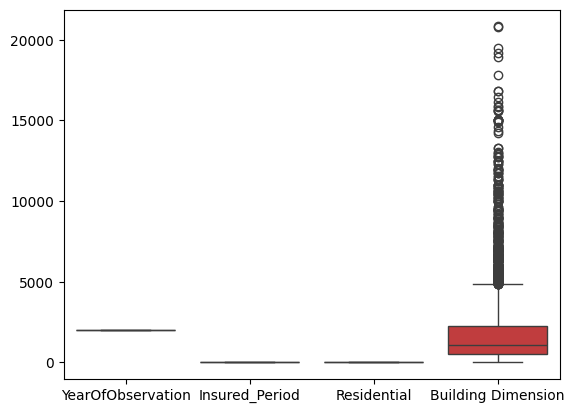

In [581]:
list_col_num=list(df_assurance.select_dtypes(include='number'))
sns.boxplot(data=df_assurance[list_col_num])
plt.show()

Traitement des valeurs aberrantes

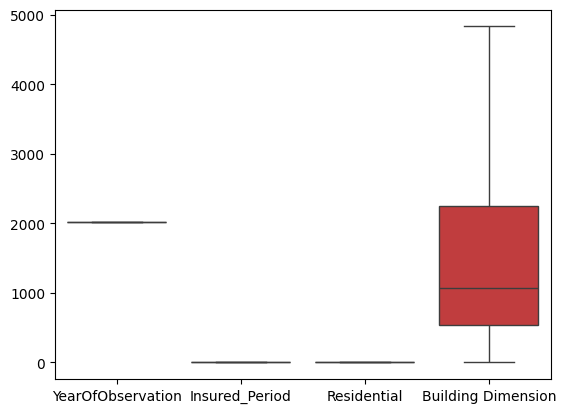

In [582]:
def adjust_outliers(df, col):
    Q1,Q3=np.percentile(df[col], [25,75])
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    df[col]=np.where(df[col]>upper_limit,upper_limit, np.where(df[col]<lower_limit,lower_limit,df[col]))
adjust_outliers(df_assurance,'Building Dimension')
sns.boxplot(data=df_assurance[list_col_num])
plt.show()

In [583]:
df_assurance=df_assurance.iloc[:,1:]
df_assurance.sort_values(by='YearOfObservation', inplace=True, ascending=True, ignore_index=True)
df_assurance1=df_assurance[df_assurance.duplicated()]
df_assurance1

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
847,2012,1.0,0,N,V,V,U,2208.0,Fire-resistive,without,13071,oui
944,2012,1.0,0,N,V,V,U,250.0,Non-combustible,without,64122,non
1129,2012,1.0,0,V,N,O,R,4142.0,Non-combustible,>=10,38229,non
1237,2012,1.0,0,V,N,O,R,400.0,Wood-framed,4,6069,non
1299,2012,1.0,1,V,N,O,R,999.0,Non-combustible,3,66130,non
2130,2013,1.0,0,V,N,O,R,450.0,Non-combustible,3,34172,non
2381,2013,0.5,1,N,V,V,U,315.0,Non-combustible,without,66130,non
2809,2014,1.0,0,V,N,O,R,4830.0,Non-combustible,>=10,78372,oui
2857,2014,1.0,1,V,N,O,R,2200.0,Wood-framed,7,75118,oui
3070,2014,1.0,0,V,V,V,U,550.0,Non-combustible,without,38931,non


In [584]:
df_assurance.drop_duplicates(inplace=True,ignore_index=True)
df_assurance

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2012,1.0,0,N,V,V,U,380.0,Non-combustible,without,66136,non
1,2012,1.0,0,V,V,V,U,353.0,Non-combustible,without,13211,non
2,2012,1.0,0,V,N,O,R,3900.0,Non-combustible,3,38547,non
3,2012,1.0,0,V,N,O,R,4830.0,Non-combustible,4,83118,non
4,2012,1.0,0,N,V,V,U,250.0,Non-combustible,without,51108,non
...,...,...,...,...,...,...,...,...,...,...,...,...
4992,2016,1.0,0,V,V,V,U,1250.0,Non-combustible,without,34324,oui
4993,2016,1.0,1,V,N,O,R,2175.0,Ordinary,5,94067,non
4994,2016,1.0,1,N,V,V,U,1176.0,Ordinary,without,94067,oui
4995,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui


Remplissage des valeurs dans la colonne: NumberOfWindows

In [585]:
df_assurance['NumberOfWindows']=np.where(df_assurance['NumberOfWindows']!="without","with",df_assurance['NumberOfWindows'])
df_assurance

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,2012,1.0,0,N,V,V,U,380.0,Non-combustible,without,66136,non
1,2012,1.0,0,V,V,V,U,353.0,Non-combustible,without,13211,non
2,2012,1.0,0,V,N,O,R,3900.0,Non-combustible,with,38547,non
3,2012,1.0,0,V,N,O,R,4830.0,Non-combustible,with,83118,non
4,2012,1.0,0,N,V,V,U,250.0,Non-combustible,without,51108,non
...,...,...,...,...,...,...,...,...,...,...,...,...
4992,2016,1.0,0,V,V,V,U,1250.0,Non-combustible,without,34324,oui
4993,2016,1.0,1,V,N,O,R,2175.0,Ordinary,with,94067,non
4994,2016,1.0,1,N,V,V,U,1176.0,Ordinary,without,94067,oui
4995,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui


Visualisation des distributions(attribut continue)

In [586]:
plt.figure(figsize=(11, 5))
def KDE_Courbe(df):
    for i in range(len(list_col_num)):
        plt.subplot(2, 2, i + 1)
        sns.kdeplot(df[list_col_num[i]],bw_method='scott',bw_adjust=1)

<Figure size 1100x500 with 0 Axes>

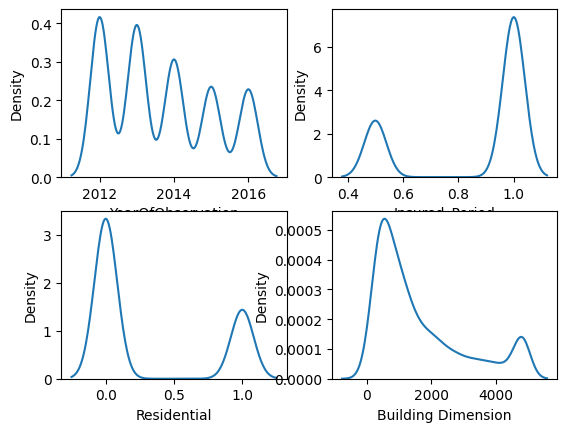

In [587]:
KDE_Courbe(df_assurance)


Transformation des données : Quantile Transformer

KBinsDiscretizer(encode='ordinal', n_bins=4, subsample=4997)

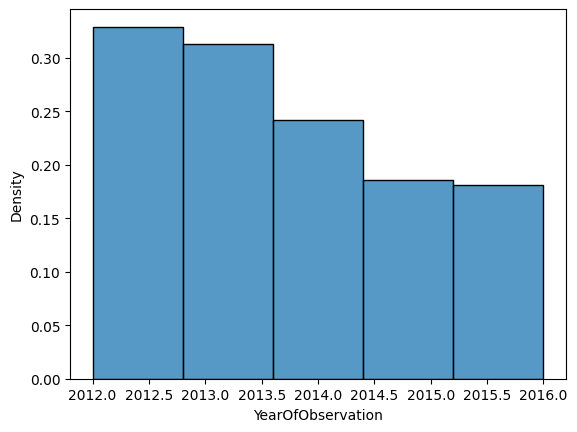

In [588]:
sns.histplot(df_assurance['YearOfObservation'], stat='density', bins=5)
enc=KBinsDiscretizer(n_bins=4,encode='ordinal', strategy='quantile',subsample=len(df_assurance))
enc

In [589]:
def tracageComparaisonCourbe(col,distribution):
    data = df_assurance[col].values.reshape(-1, 1)
    # Appliquer QuantileTransformer
    qt = QuantileTransformer(output_distribution=distribution, random_state=0)
    data_transformed = qt.fit_transform(data)
    # Tracer les distributions avant et après la transformation
    plt.figure(figsize=(12, 6))
    # Avant transformation
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=15, color='skyblue', edgecolor='black')
    plt.title('Avant transformation')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    # Après transformation
    plt.subplot(1, 2, 2)
    plt.hist(data_transformed, bins=15, color='salmon', edgecolor='black')
    plt.title('Après Quantile Transformation')
    plt.xlabel('Valeurs transformées')
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()

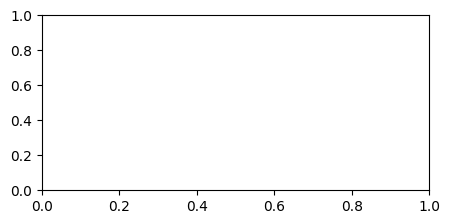

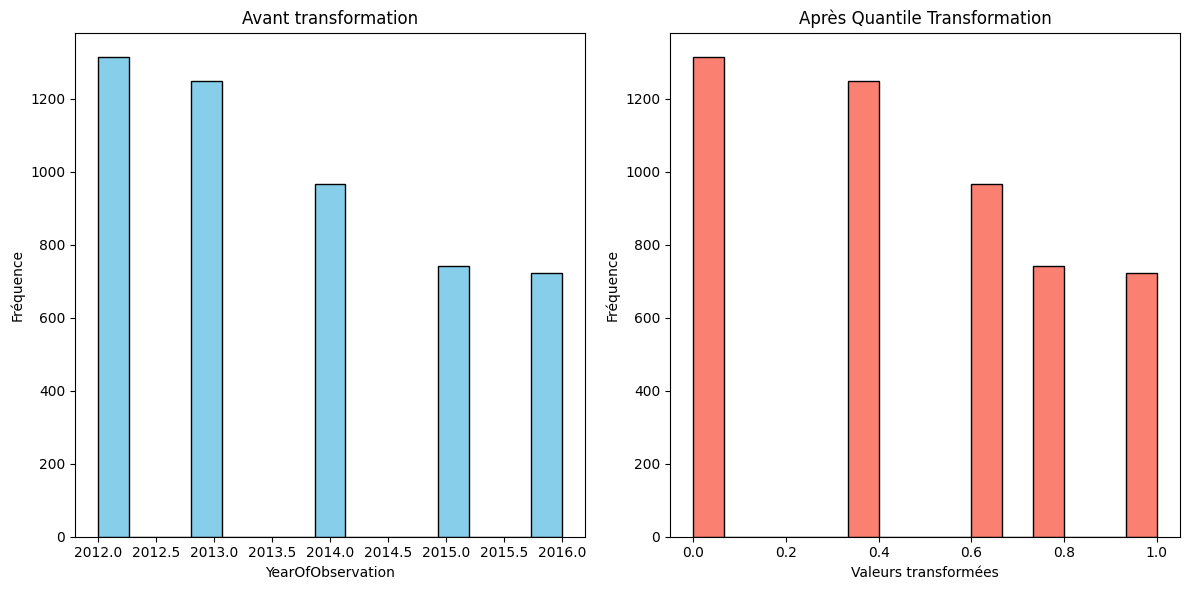

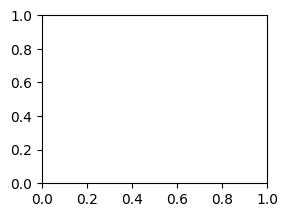

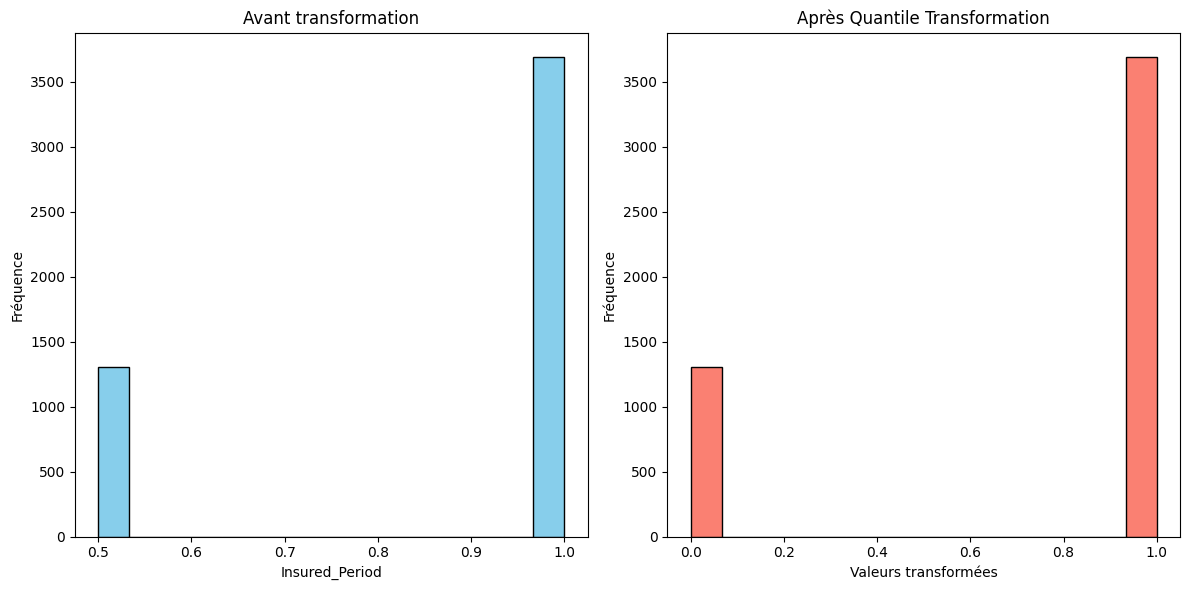

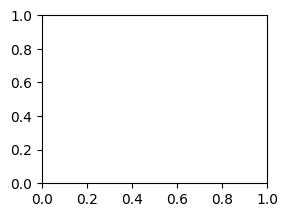

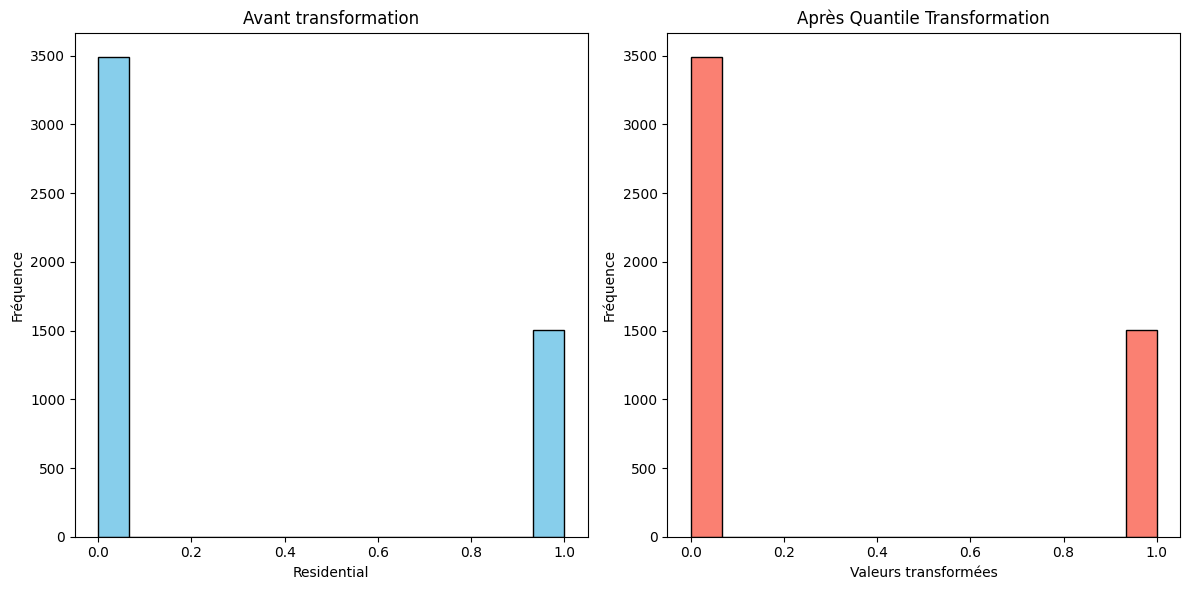

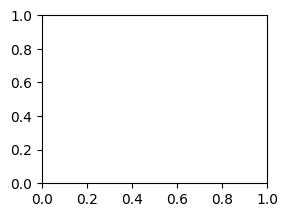

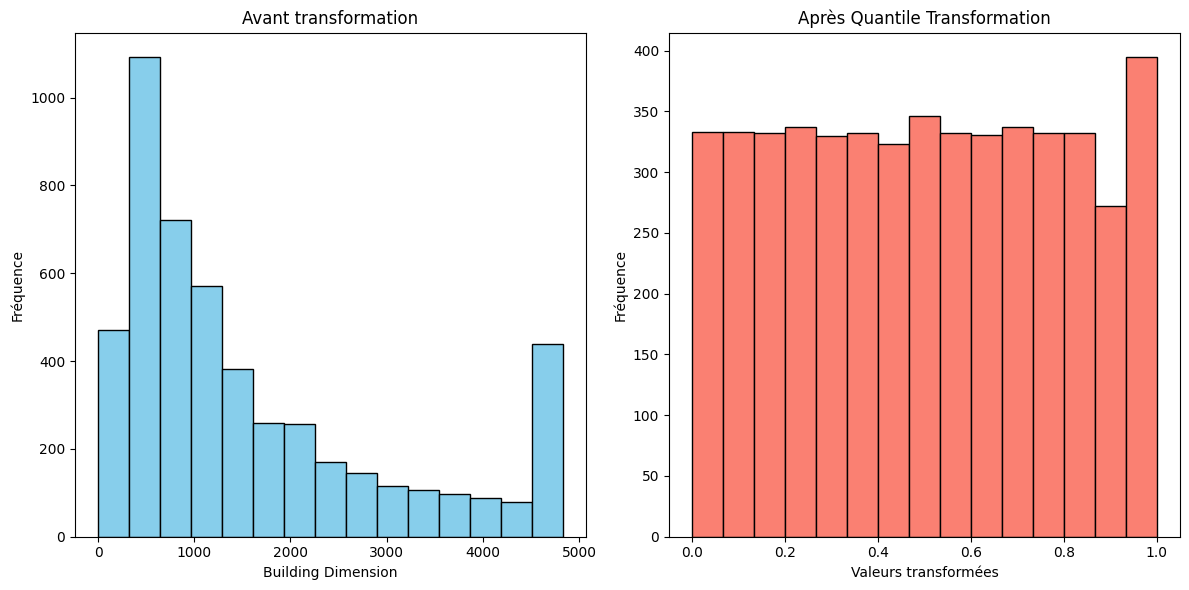

In [590]:
plt.figure(figsize=(11, 5))
def tracageUniform():
    for i in range(len(list_col_num)):
        plt.subplot(2, 2, i + 1)
        tracageComparaisonCourbe(list_col_num[i],'uniform')
tracageUniform()
    